# 4.3 The Particle Filter

## 4.3.1 Basic Algorithm

The particle filter is an alternative nonparametric implementation of the Bayes filter.

In particle filters, the samples of a posterior distribution are called particles and are denoted

$ \chi_t := x^{[1]}_t, x^{[2]}_t, \dots, x^{[M]}_t$

, where $x^{[m]}_t$ and $\chi_t$ denote particle and particle set, respectively.


Table 4.3 The particlef filter algorithm

Algorithm Particle_filter($\chi_{t-1}$, $u_t$, $z_t$)

- $\bar{\chi}_t = \chi_t = \emptyset $

- for $m$ = 1 to $M$ do
  - sample $x^{[m]}_t \sim p(x_t \mid u_t, x^{[m]}_{t-1})$
  - $w^{[m]}_t = p(z_t \mid x^{[m]}_t)$
  - $\bar{\chi}_t = \bar{\chi}_t + <x^{[m]}_t, w^{[m]}_t>$
- endfor

- for $m$ = 1 to $M$ do
  - draw $i$ with probability $\propto w^{[i]}_t$
  - add $x^{[i]}_t$ to $\chi_t$
- endfor

return $ \chi_t $



## 4.3.2 Importance Sampling

Intuitively, we are faced with the problem of computing an expectation over a probability density function $f$, but we are only given samples generated from a different probability density function $g$. For example, we might be interested in the expectation that $x \in A$. We can express this probability as an expectation over $g$.

\begin{split}
E_f\left[ I(x \in A)\right] &= \int f(x) I(x \in A) dx \\
&= \int \frac{f(x)}{g(x)} g(x) I(x \in A) dx \\
&= \int w(x) g(x) I(x \in A) dx \\
&= E_g\left[ w(x) I(x \in A) \right]

\end{split}

Here $w(x) = \frac{f(x)}{g(x)}$ is a weighting factor.

The empirical count of particles that fall into A converges to the integral of $g$ under $A$.

$$\frac{1}{M} \sum^M_{m=1} I(x^{[m]} \in A) \rightarrow \int_A g(x)dx $$

To offset this difference between $f$ and $g$, particles $x^{[m]}$ are weighted by the quotient

$$ w^{[m]} = \frac{f(x^{[m]})}{g(x^{[m]})} $$

Importance weights are the non-normalized probability mass of each particle. In particular, we have
$$ \left[ \sum^M_{m=1} w^{[m]} \right]^{-1} \sum^M_{m=1} I(x^{[m]} \in A) w^{[m]} \rightarrow \int_A f(x) dx $$

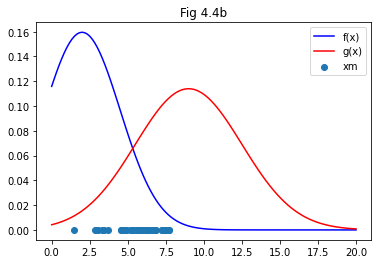

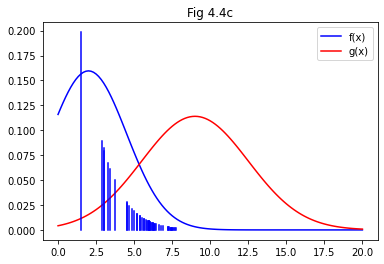

In [196]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 20, 121)

mean_f = 2.0
std_f = 2.5
mean_g = 9.0
std_g = 3.5

def normal_dist(mean_x, std_x, x):
    fx = 1/(std_x*np.sqrt(2*np.pi)) * np.exp(-1/2*((x-mean_x) / std_x)**2)
    
    return fx

fx = normal_dist(mean_f, std_f, x)
gx = normal_dist(mean_g, std_g, x)

# samples x ~ g(x)
M = 50
epsilon = 1e-2
X = []

m = 0
while m < M:
    xm = np.random.randn(1) * std_g + mean_g

    fxm = normal_dist(mean_f, std_f, xm)
    gxm = normal_dist(mean_g, std_g, xm)

    if fxm >= epsilon and gxm >= epsilon:
        X.append(xm)
        m += 1

X = np.array(X)
fx_particle = normal_dist(mean_f, std_f, X)
gx_particle = normal_dist(mean_g, std_g, X)

w = np.zeros(M)
sum_w = 0.0
for m in range(M):
    w[m] = fx_particle[m] / gx_particle[m]
    sum_w += w[m]

for m in range(M):
    w[m] /= sum_w

plt.figure()
plt.plot(x, fx, label='f(x)', c='b')
plt.plot(x, gx, label='g(x)', c='r')
plt.scatter(X, np.zeros(M), label='xm')

plt.title('Fig 4.4b')
plt.legend()


plt.figure()
plt.plot(x, fx, label='f(x)', c='b')
plt.plot(x, gx, label='g(x)', c='r')

for m in range(M):
    plt.plot([X[m], X[m]], [0, w[m]], c='b')

plt.title('Fig 4.4c')
plt.legend()





## 4.3.4 Practical Consideration and Properties of Particle Filters

Resampling

Table 4.4 Algorithm Low_variance_sampler($\chi_t$, $\omega_t$)

 - $\bar{\chi}_t = \emptyset$
 - $r = \text{rand}(0; M^{-1})$
 - $c = \omega^{[1]}_t$
 - $i = 1$
 - for $m$ = 1 to $M$ do
   - $ U = r + (m-1) \cdot M^{-1} $
   - while $U > c$
     - $i = i + 1$
     - $c = c + \omega^{[i]}_t$
   - endwhile
   - add $x^{[i]}_t$ to $\bar{\chi}_t$
 - endfor
 - return $\bar{\chi}_t$
   